In [7]:
# 1. Анализ предметной области и набора данных

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student-mat.csv')


df.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


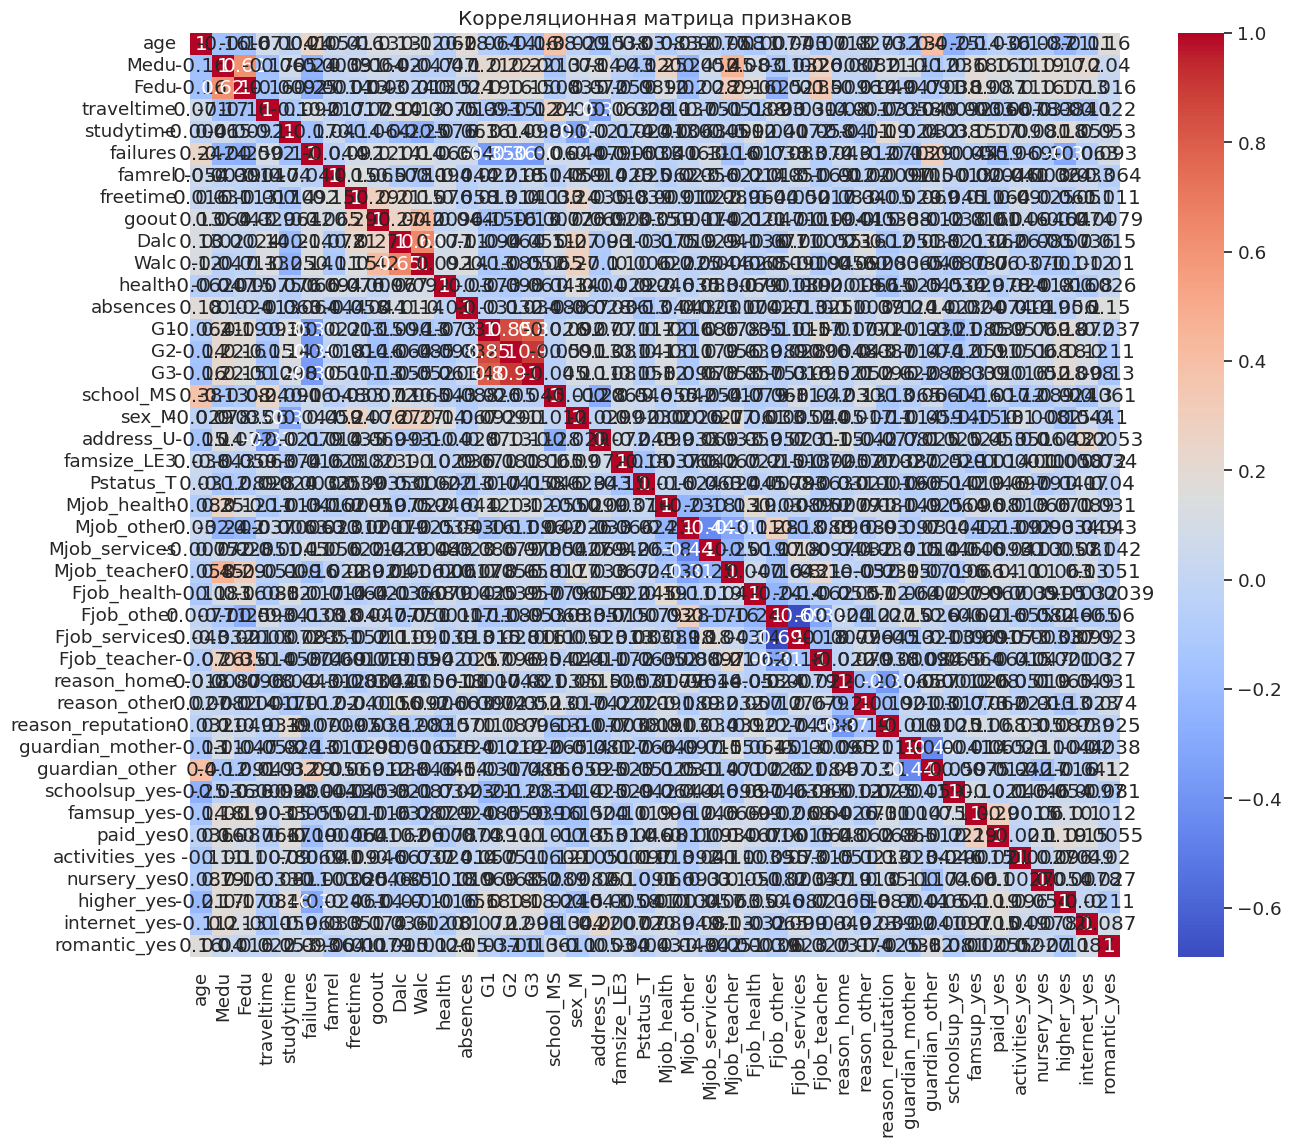

In [13]:
# 2. Проектирование признаков и выбор метрик оценки качества

# Преобразование категориальных признаков в бинарные

categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Цветовая матрица корреляции

plt.figure(figsize=(15,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

In [17]:
# Вычисление корреляции признаков с целевой переменной G3

corr_with_target = df_encoded.corr()['G3'].abs().sort_values(ascending=False)

# Выбор признаков с абсолютной корреляцией больше 0.2

selected_features = corr_with_target[corr_with_target > 0.2].index.tolist()
selected_features.remove('G3')  # Удаляем целевую переменную из списка признаков

print("Выбранные признаки:", selected_features)



Выбранные признаки: ['G2', 'G1', 'failures', 'Medu']


In [18]:
# Вычисление корреляции признаков с целевой переменной G3

corr_with_target = df_encoded.corr()['G3'].abs().sort_values(ascending=False)

# Выбор признаков с абсолютной корреляцией больше 0.2

selected_features = corr_with_target[corr_with_target > 0.2].index.tolist()
selected_features.remove('G3')  # Удаляем целевую переменную из списка признаков

print("Выбранные признаки:", selected_features)



Выбранные признаки: ['G2', 'G1', 'failures', 'Medu']


In [19]:
# Формирование данных для модели

X = df_encoded[selected_features]
y = df_encoded['G3']



In [1]:
# Масштабирование признаков

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



ModuleNotFoundError: No module named 'sklearn'

In [23]:
!python -m pip install   scikit-learn



Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 9.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 17.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


# Формирование данных для модели

X = df_encoded[selected_features]
y = df_encoded['G3']

